In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Concrete_Strength_prediction/Concrete Data.csv') 

In [ ]:
dataset.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
dataset.shape

(1030, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age_in_days                    1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
dataset.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_in_days,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


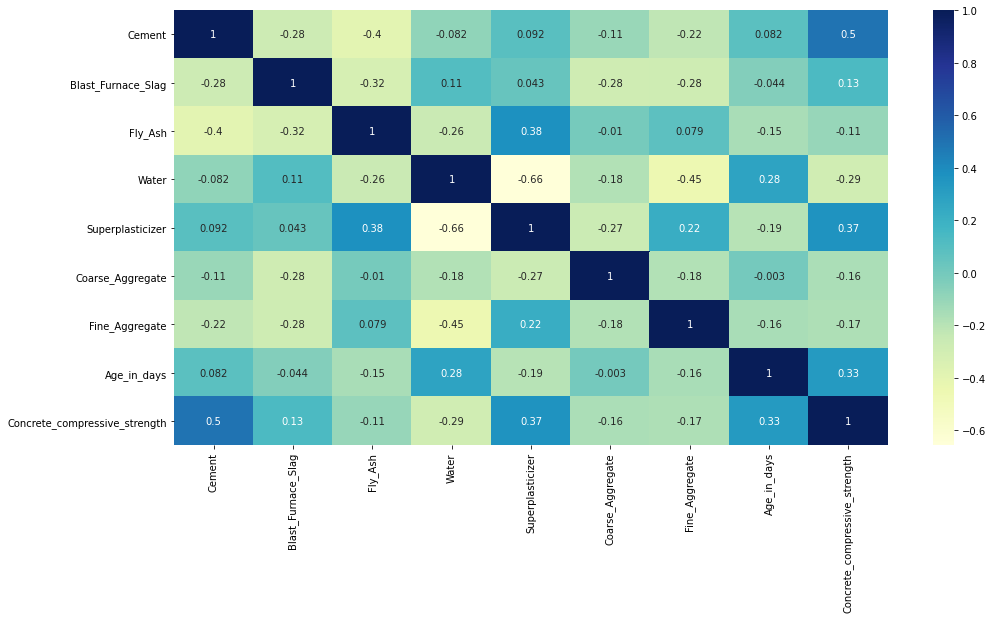

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can observe in above correlation matrix :

```
*   There is High correlation of cement with strength
*   Superplasticizer and Age also have good correlation with strength
```



In [ ]:
dataset.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age_in_days                      0
Concrete_compressive_strength    0
dtype: int64

# Exploratory Data Analysis

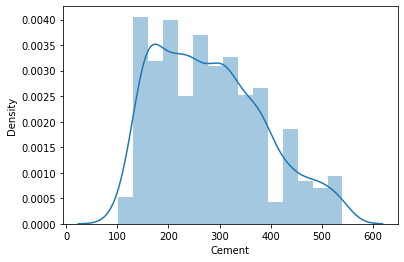

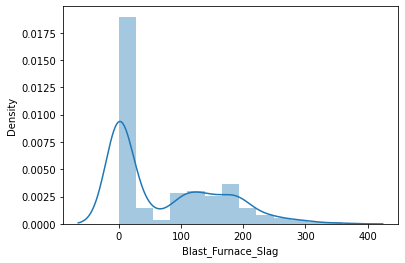

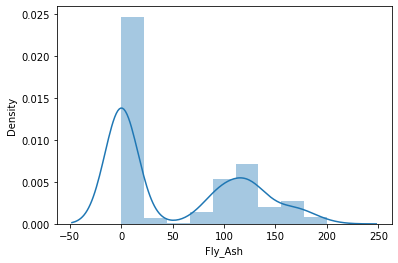

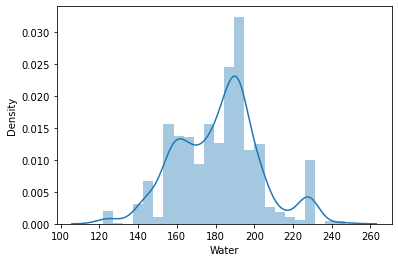

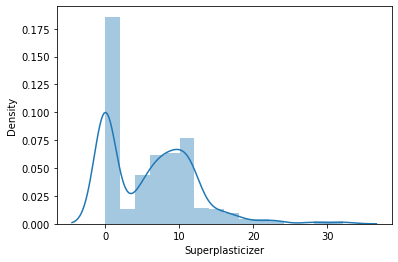

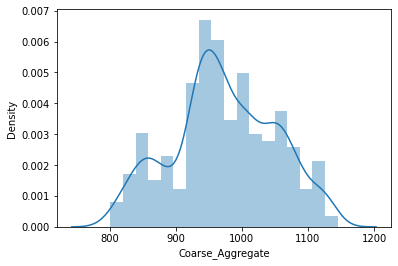

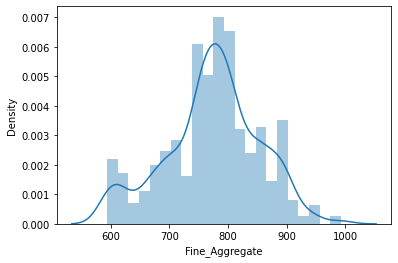

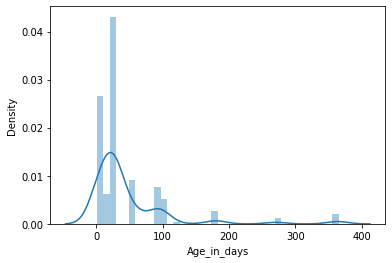

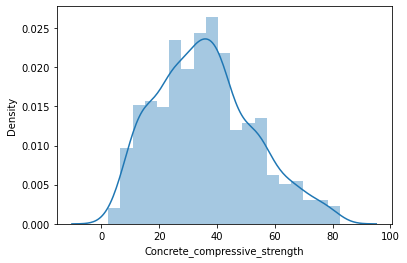

In [ ]:
for i in dataset.columns:
    sns.distplot(dataset[i])
    plt.show()

**Observations**

```
1.   Distribution of cement appears nearly normal
2.   Water and Superplastic have near normal distributions
3.   Age data confirms the presence of outliers
4.   Strength is normally distributed
```



In [ ]:
# q1=dataset.quantile(0.25)
# q3=dataset.quantile(0.75)
# IQR=q3-q1
# cwo=((dataset.iloc[:] <(q1-1.5*IQR))|(dataset.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
# opdf=pd.DataFrame(cwo,index=dataset.columns,columns=['No. of Outliers'])
# opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(dataset),2)
# opdf

**Box Plot : Checking and Removing Outliers**

In [ ]:
# plt.subplots(figsize=(12, 6))
# ax = sns.boxplot(data=dataset)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


Observations
```
1.   Age Column having maximum number of outliers.
2.   Blast_furnace _Slag, water, superplastic, fine aggregate having some outliers.
3.   Cement, fly ash, coarse aggregate have no outliers.
```



In [ ]:
# # Removing Outliers
# def remove_outliers(df, column , minimum, maximum):
#     col_values = df[column].values
#     df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
#     return df

In [ ]:
# min_val = dataset["Age_in_days"].min()
# max_val = 125
# dataset = remove_outliers(df=dataset, column='Age_in_days' , minimum=min_val, maximum=max_val)

# min_val = dataset["Fine_Aggregate"].min()
# max_val = 950
# dataset = remove_outliers(df=dataset, column='Fine_Aggregate' , minimum=min_val, maximum=max_val)

# min_val = dataset["Superplasticizer"].min()
# max_val = 24
# dataset = remove_outliers(df=dataset, column='Superplasticizer' , minimum=min_val, maximum=max_val)

# min_val = dataset["Blast_Furnace_Slag"].min()
# max_val = 340
# dataset = remove_outliers(df=dataset, column='Blast_Furnace_Slag' , minimum=min_val, maximum=max_val)

# min_val = 125
# max_val = 225
# dataset = remove_outliers(df=dataset, column='Water' , minimum=min_val, maximum=max_val)

In [ ]:
# plt.subplots(figsize=(12, 6))
# ax = sns.boxplot(data=dataset)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

As we can observe in boxplot that we have successfully removed most of the outliers.

# Data Preprocessing

In [ ]:
# splitting the dataset into independent and dependent variables
conc = dataset
X = conc.iloc[:,:-1].values
y = conc.iloc[:, -1].values
y = y.reshape(len(y),1)

In [ ]:
X.shape

(1030, 8)

In [ ]:
y.shape

(1030, 1)

In [ ]:
# Splitting the data into train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (721, 8)
y_train shape (721, 1)
X_test shape (309, 8)
y_test shape (309, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Predictive Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[39.47 26.06]
 [14.08 10.35]
 [60.91 79.3 ]
 [53.49 74.99]
 [23.96  9.69]
 [53.38 47.1 ]
 [45.65 59.  ]
 [26.92 22.72]
 [52.89 61.89]
 [37.14 52.12]
 [16.55 17.54]
 [38.81 48.15]
 [29.48 38.33]
 [35.14 17.2 ]
 [47.8  56.83]
 [56.46 55.25]
 [35.44 33.36]
 [29.2  34.68]
 [48.35 52.61]
 [35.12 39.94]
 [53.45 61.46]
 [31.87 27.63]
 [32.38 32.9 ]
 [47.9  41.64]
 [23.45 17.54]
 [23.33 26.85]
 [69.82 66.9 ]
 [26.3  21.06]
 [56.46 61.07]
 [47.8  66.95]
 [18.73 20.87]
 [36.33 48.79]
 [17.26 24.05]
 [19.75 47.81]
 [24.46 21.16]
 [15.05  6.94]
 [52.94 28.6 ]
 [27.79 26.31]
 [26.74 33.95]
 [25.96 25.72]
 [52.52 37.8 ]
 [30.34 35.17]
 [26.02 32.24]
 [35.01 37.81]
 [53.04 57.23]
 [54.01 33.4 ]
 [30.33 30.14]
 [43.96 33.8 ]
 [27.49 35.08]
 [56.66 52.91]
 [36.42 40.93]
 [19.19 21.75]
 [23.3  16.5 ]
 [34.36 42.35]
 [43.01 50.94]
 [47.19 64.02]
 [35.4  52.2 ]
 [52.89 53.39]
 [59.9  64.3 ]
 [36.31 44.52]
 [30.99 37.42]
 [20.58 22.14]
 [50.34 62.94]
 [55.61 45.7 ]
 [20.37 14.64]
 [43.77 53.58]
 [33.03 33

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
print(coefficient_of_dermination)
r2 = coefficient_of_dermination

0.6352987285077925


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-8-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.6324411279476184


In [ ]:
import sklearn.metrics as metrics
metrics.mean_absolute_error(y_test, y_pred)

7.775625710189037

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
regression_results(y_test,y_pred)

explained_variance:  0.6386
r2:  0.6353
MAE:  7.7756
MSE:  93.6187
RMSE:  9.6757


# Predictive Model 3: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[25.61 26.06]
 [ 7.51 10.35]
 [79.3  79.3 ]
 [56.4  74.99]
 [10.76  9.69]
 [54.1  47.1 ]
 [58.52 59.  ]
 [19.42 22.72]
 [79.99 61.89]
 [56.14 52.12]
 [17.58 17.54]
 [40.39 48.15]
 [39.64 38.33]
 [12.37 17.2 ]
 [55.55 56.83]
 [56.14 55.25]
 [42.29 33.36]
 [35.76 34.68]
 [59.76 52.61]
 [34.74 39.94]
 [56.14 61.46]
 [26.94 27.63]
 [21.5  32.9 ]
 [59.76 41.64]
 [14.54 17.54]
 [25.18 26.85]
 [68.3  66.9 ]
 [31.35 21.06]
 [56.14 61.07]
 [66.82 66.95]
 [19.77 20.87]
 [48.85 48.79]
 [24.28 24.05]
 [27.83 47.81]
 [21.18 21.16]
 [ 4.9   6.94]
 [36.3  28.6 ]
 [25.37 26.31]
 [29.89 33.95]
 [31.64 25.72]
 [39.3  37.8 ]
 [31.35 35.17]
 [31.87 32.24]
 [38.2  37.81]
 [38.46 57.23]
 [33.4  33.4 ]
 [24.07 30.14]
 [25.61 33.8 ]
 [32.82 35.08]
 [51.73 52.91]
 [40.93 40.93]
 [27.83 21.75]
 [16.5  16.5 ]
 [39.61 42.35]
 [56.81 50.94]
 [43.94 64.02]
 [29.07 52.2 ]
 [47.72 53.39]
 [64.3  64.3 ]
 [25.46 44.52]
 [36.45 37.42]
 [24.45 22.14]
 [67.77 62.94]
 [54.9  45.7 ]
 [17.17 14.64]
 [76.24 53.58]
 [39.42 33

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
print(coefficient_of_dermination)
r2 = coefficient_of_dermination

0.7729539863359284


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-8-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.7711749774139768


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
regression_results(y_test,y_pred)

explained_variance:  0.775
r2:  0.773
MAE:  4.9561
MSE:  58.2827
RMSE:  7.6343


# Predictive Model 3: Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[28.98 26.06]
 [ 7.91 10.35]
 [79.1  79.3 ]
 [63.29 74.99]
 [10.95  9.69]
 [50.09 47.1 ]
 [63.15 59.  ]
 [27.35 22.72]
 [71.34 61.89]
 [54.96 52.12]
 [17.47 17.54]
 [40.26 48.15]
 [34.75 38.33]
 [13.61 17.2 ]
 [51.13 56.83]
 [56.14 55.25]
 [38.21 33.36]
 [35.3  34.68]
 [52.21 52.61]
 [38.44 39.94]
 [63.64 61.46]
 [27.74 27.63]
 [27.68 32.9 ]
 [47.89 41.64]
 [14.58 17.54]
 [26.38 26.85]
 [64.43 66.9 ]
 [25.51 21.06]
 [56.14 61.07]
 [64.61 66.95]
 [21.96 20.87]
 [46.07 48.79]
 [27.68 24.05]
 [36.57 47.81]
 [19.59 21.16]
 [ 7.36  6.94]
 [35.28 28.6 ]
 [28.42 26.31]
 [34.84 33.95]
 [29.64 25.72]
 [36.79 37.8 ]
 [34.28 35.17]
 [30.14 32.24]
 [38.9  37.81]
 [58.02 57.23]
 [32.34 33.4 ]
 [28.55 30.14]
 [37.27 33.8 ]
 [33.88 35.08]
 [50.4  52.91]
 [40.87 40.93]
 [28.75 21.75]
 [18.53 16.5 ]
 [37.35 42.35]
 [50.57 50.94]
 [47.15 64.02]
 [47.44 52.2 ]
 [57.6  53.39]
 [64.3  64.3 ]
 [39.22 44.52]
 [36.09 37.42]
 [23.38 22.14]
 [59.68 62.94]
 [41.93 45.7 ]
 [11.7  14.64]
 [62.58 53.58]
 [38.02 33

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
print(coefficient_of_dermination)
r2 = coefficient_of_dermination

0.8907929451251135


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-8-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.8899372581133612


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
regression_results(y_test,y_pred)

explained_variance:  0.891
r2:  0.8908
MAE:  3.8084
MSE:  28.0334
RMSE:  5.2947


# **Feature Importance**

In [ ]:
conc.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_in_days',
       'Concrete_compressive_strength'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import scale
from matplotlib import pyplot
X_scale = X
X_scale = pd.DataFrame(X_scale)
cols = X_scale.columns
X_scale = pd.DataFrame(scale(X_scale))
X_scale.columns = cols
X_scale.columns
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
# fit the model
model.fit(X_scale, y)
# get importance
importance = model.feature_importances_
l1=[]
l0=[]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    l1.append(v);
    l0.append(i);
    # df = pd.DataFrame({"Feature": l0})
    ds = pd.DataFrame({'Score': l1})
    



Feature: 0, Score: 0.30482
Feature: 1, Score: 0.08500
Feature: 2, Score: 0.02030
Feature: 3, Score: 0.09500
Feature: 4, Score: 0.07517
Feature: 5, Score: 0.02306
Feature: 6, Score: 0.03522
Feature: 7, Score: 0.36143


In [ ]:
# ds.sort_values(by='Score', inplace= True)

In [ ]:
# ds = ds.values.tolist()

In [ ]:
labels = ['Fly_Ash','Coarse_Aggregate','Fine_Aggregate','Superplasticizer','Blast_Furnace_Slag','Water','Cement','Age_in_days']
values = [0.015521362089047712,0.02981439453039121,0.03305379572588684,0.054141495615557284,0.08807498372424608,0.12440299503903117,0.30235118844534514,0.35263978483049463]

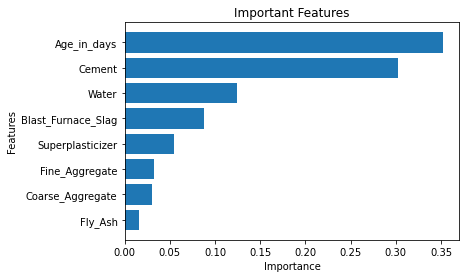

In [ ]:
# ds.plot.barh(title = 'partner_category and Is_Fraud',color = 'purple')
plt.barh(labels, values)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Important Features')
plt.show()


## **Now I will Try using some Feature Selection Methods to select only that feature which makes our model robust and better.**

**Backward Elimination**

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.regression.linear_model as lm
import statsmodels.regression.linear_model as sm
import statsmodels.api as smm
X_1 = smm.add_constant(X)
#Fitting sm.OLS model
model = lm.OLS(y,X_1).fit()
model.pvalues

array([3.80e-01, 1.90e-41, 1.60e-23, 5.02e-12, 2.01e-04, 1.81e-03,
       5.44e-02, 5.95e-02, 5.78e-82])

In [ ]:
#Backward Elimination
X1 = pd.DataFrame(X)
cols = list(X1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X1[cols]
    X_1 = smm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[0, 1, 2, 3, 4, 7]


**'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer','Age_in_days' are the features I got using Backward elimination**


Now I will make model on all these features.

In [ ]:
X = conc.loc[:, ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer','Age_in_days']]
y = conc.loc[:,['Concrete_compressive_strength']]

In [ ]:
# Splitting the data into train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (721, 6)
y_train shape (721, 1)
X_test shape (309, 6)
y_test shape (309, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Predictive Model 1: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
print(coefficient_of_dermination)
r2 = coefficient_of_dermination

0.6374040663473708


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-7-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.6349205325552295


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
regression_results(y_test,y_pred)

explained_variance:  0.6403
r2:  0.6374
MAE:  7.7396
MSE:  93.0783
RMSE:  9.6477


**Predictive Model 2: Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
print(coefficient_of_dermination)
r2 = coefficient_of_dermination

0.8107630434217364


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-7-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.8094668998835292


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
regression_results(y_test,y_pred)

explained_variance:  0.8115
r2:  0.8108
MAE:  4.3782
MSE:  48.5771
RMSE:  6.9697


**Predictive Model 3: Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test, y_pred)
print(coefficient_of_dermination)
r2 = coefficient_of_dermination

0.9103350139186328


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-7-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.9097208701783495


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
regression_results(y_test,y_pred)

explained_variance:  0.9107
r2:  0.9103
MAE:  3.521
MSE:  23.017
RMSE:  4.7976


# **Recursive Feature Elimination**

In [ ]:
X = conc.iloc[:,:-1].values
y = conc.iloc[:, -1].values
y = y.reshape(len(y),1)

In [ ]:
 # importing necessary libary for RFE
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,9)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.627310


In [ ]:
X1 = pd.DataFrame(X)
cols = list(X1.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 6)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Int64Index([0, 1, 2, 3, 4, 7], dtype='int64')


**We got same features again using RFE. We have already made and tried different features on above features.**

# Now trying hyperparameter tuning on Random Forest to find best attributes and features to make my model better 

In [ ]:
X = conc.iloc[:,:-1].values
y = conc.iloc[:, -1].values
y = y.reshape(len(y),1)

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


In [ ]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_random.best_score_

-32.08103775180856

In [ ]:
y_pred=rf_random.predict(X_test)

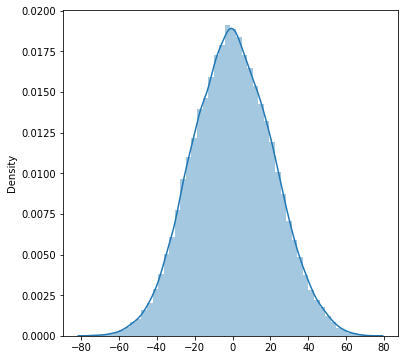

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-y_pred)

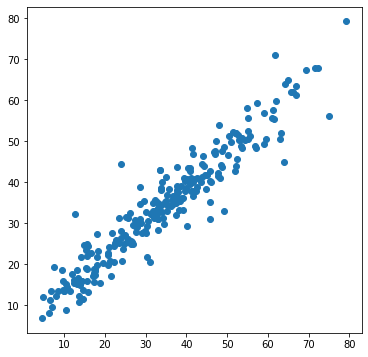

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

In [ ]:

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))
r2 = r2_score(y_true=y_test, y_pred=y_pred)

0.8976537880636116


In [ ]:
Adj_R2 = (1-((1-r2)*(1030-1))/(1030-8-1))
print('Adjusted R2 is.....',Adj_R2)

Adjusted R2 is..... 0.8968518588809563


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
 regression_results(y_test,y_pred)

explained_variance:  0.8977
mean_squared_log_error:  0.0378
r2:  0.8977
MAE:  3.6852
MSE:  26.0639
RMSE:  5.1053
